## Imports

pip install yellowbrick

In [2]:
from yellowbrick.target import FeatureCorrelation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Feature correlation

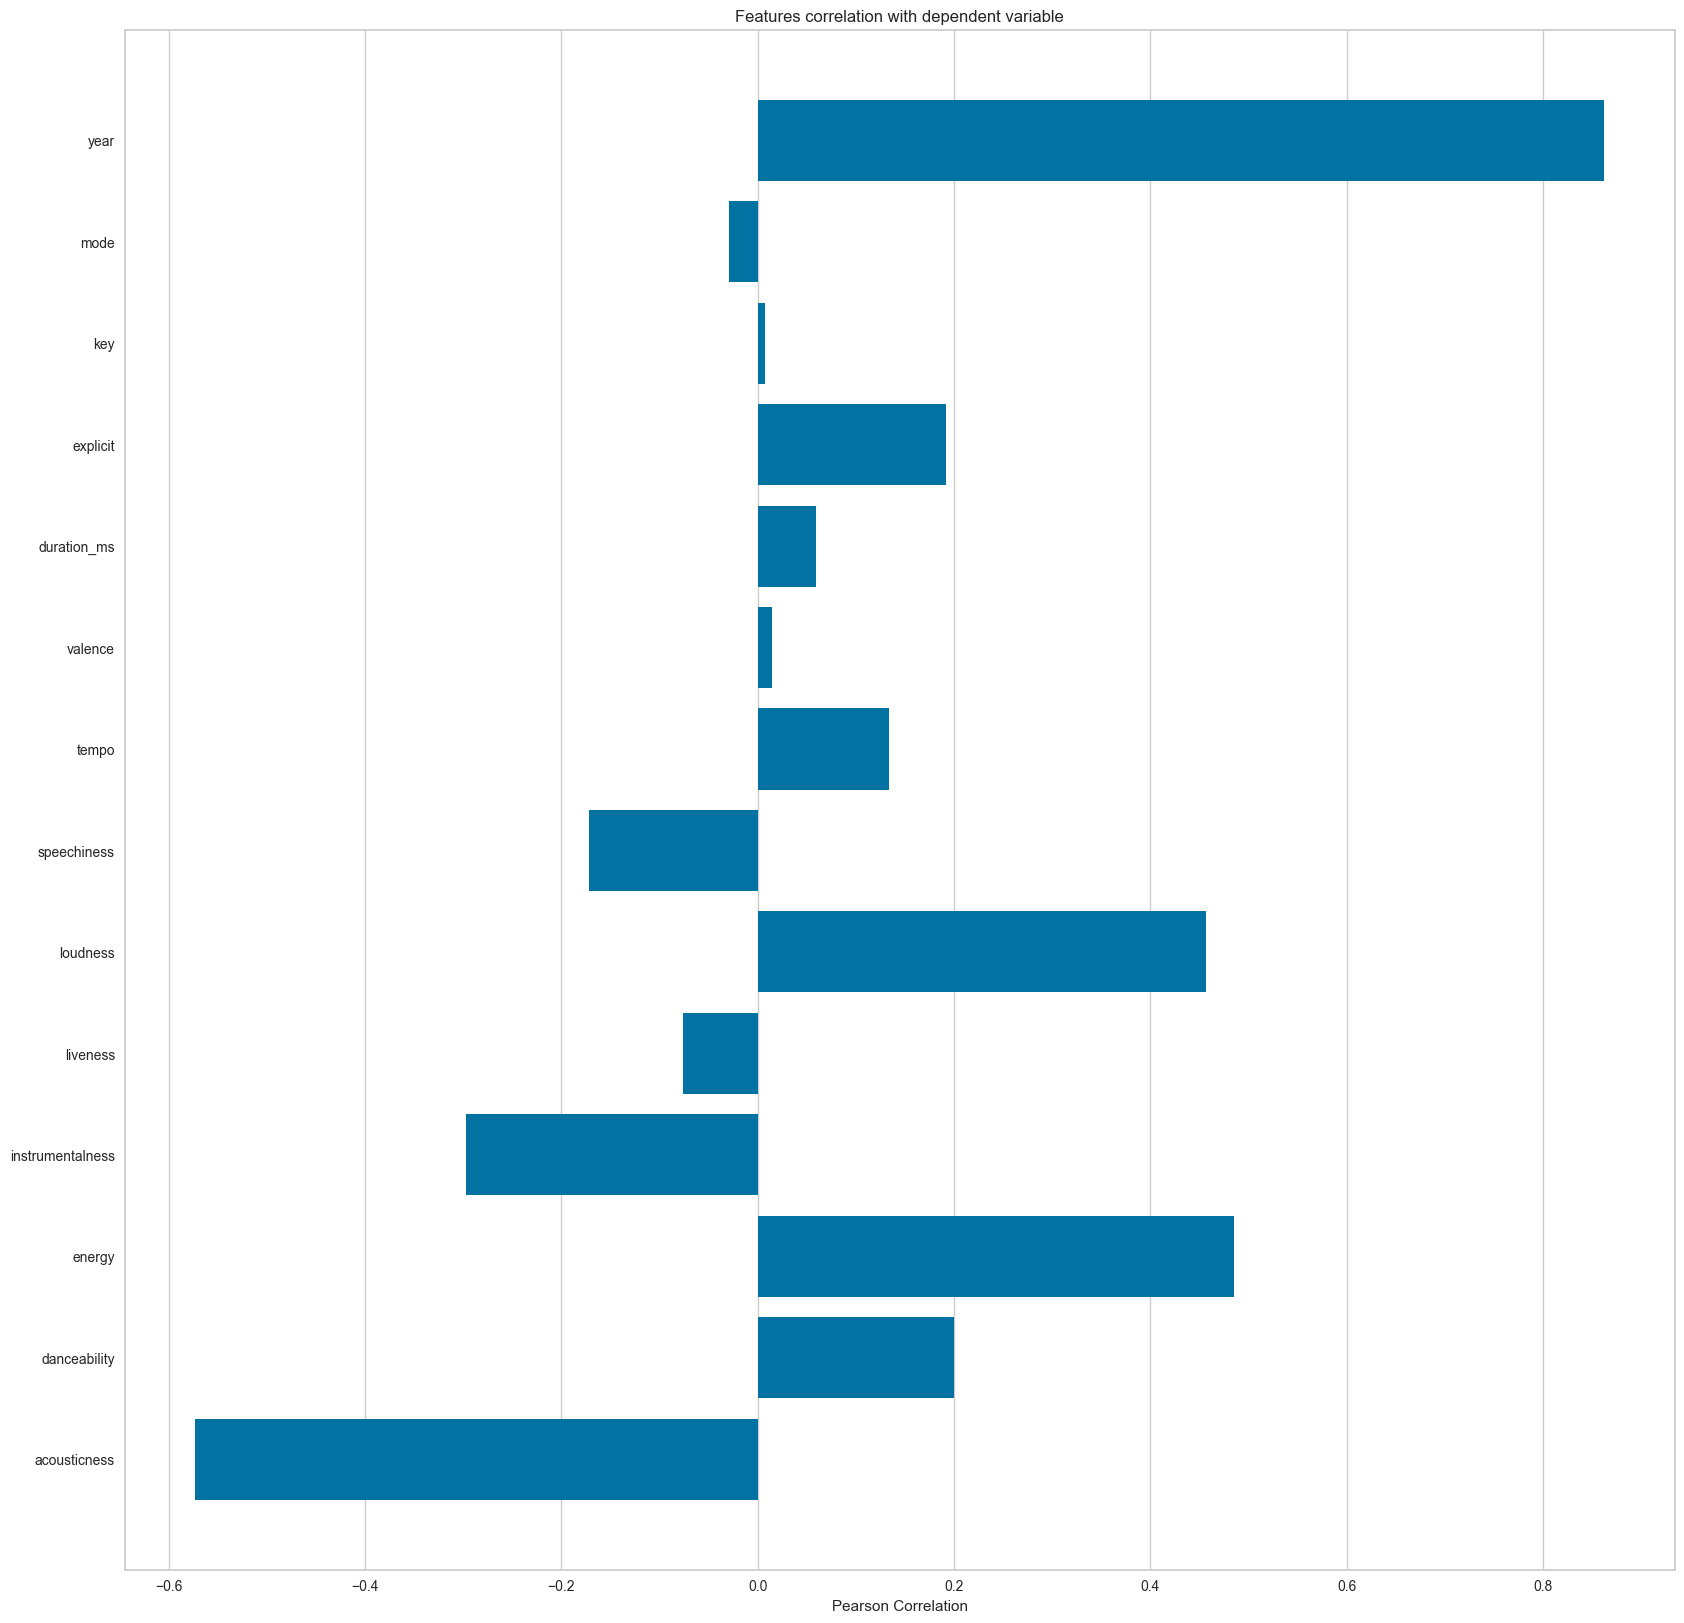

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [3]:
data = pd.read_csv("../data/data.csv")

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE

# Transformateur personnalisé pour appliquer des poids
class FeatureWeighting(BaseEstimator, TransformerMixin):
    def __init__(self, weights):
        self.weights = weights

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X * self.weights

# Spécifiez les colonnes à inclure et les poids associés
feature_columns = [
    'mode', 'acousticness', 'danceability', 'duration_ms', 
    'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence', 'popularity', 'key'
]
weights = np.array([1.5, 2.0, 1.0, 1.2, 0.8, 1.3, 1.0, 0.9, 1.1, 1.0, 1.0, 1.0, 1.4])  # Exemple de poids

# Extraction des données numériques
genre_data = pd.read_csv("../data/data_by_genres.csv")
X = genre_data[feature_columns].select_dtypes(np.number)

# Pipeline pour le clustering avec pondération
cluster_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=30, n_init=30))
])

cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Pipeline pour la réduction de dimension avec t-SNE
tsne_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),  # Appliquer les mêmes poids
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42))
])
genre_embedding = tsne_pipeline.fit_transform(X)

# Préparer les données pour la visualisation
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

# Visualisation des clusters
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres']
)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.025s...
[t-SNE] Computed neighbors for 2973 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106316
[t-SNE] KL divergence after 1000 iterations: 1.392527


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# Pipeline avec DBSCAN
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dbscan', DBSCAN(eps=1.5, min_samples=5))  # Ajustez eps et min_samples selon votre dataset
])

# Sélectionner les colonnes numériques
X = genre_data.select_dtypes(include=['number'])

# Ajuster le pipeline et récupérer les labels
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline['dbscan'].labels_

# Visualisation des clusters avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])

genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.836492
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.110214
[t-SNE] KL divergence after 1000 iterations: 1.055691


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import os

output_dir = "../data"

genres_clusters_path = os.path.join(output_dir, "genres_clusters.csv")
cluster_characteristics_path = os.path.join(output_dir, "cluster_characteristics.csv")

# Clustering
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=150, n_init=10))
])
X = genre_data.select_dtypes(include=['number'])
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Visualisation avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

# Création du premier fichier CSV : genres et clusters associés
genres_clusters_csv = genre_data[['genres', 'cluster']]
genres_clusters_csv.to_csv(genres_clusters_path, index=False)
print(f"Fichier '{genres_clusters_path}' généré avec succès.")

# Filtrer les colonnes numériques uniquement
numeric_cols = genre_data.select_dtypes(include=['number']).columns

# Création du deuxième fichier CSV : clusters et caractéristiques moyennes
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()

# Réinitialisation de l'index et gestion du conflit avec la colonne 'cluster'
cluster_means['cluster'] = cluster_means.index  # Ajoute 'cluster' en tant que colonne
cluster_means.reset_index(drop=True, inplace=True)  # Réinitialise l'index sans dupliquer 'cluster'

# Sauvegarde des caractéristiques moyennes des clusters dans un fichier CSV
cluster_means.to_csv(cluster_characteristics_path, index=False)
print(f"Fichier '{cluster_characteristics_path}' généré avec succès.")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.002s...
[t-SNE] Computed neighbors for 2973 samples in 1.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.794541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.559494
[t-SNE] KL divergence after 1000 iterations: 1.330895


Fichier '../data/genres_clusters.csv' généré avec succès.
Fichier '../data/cluster_characteristics.csv' généré avec succès.


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import plotly.express as px

# Chargement des données
genre_data = pd.read_csv("../data/data_by_genres.csv")  # Remplacez par votre chemin
genre_data['genres_names'] = genre_data['genres']  # Assurez-vous que cette colonne existe

# Étape 1 : Vectorisation des noms de genres avec TF-IDF
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))  # Bigrammes pour capturer plus de contexte
genre_name_vectors = vectorizer.fit_transform(genre_data['genres_names'])

# Étape 2 : Réduction de la dimensionnalité des noms de genres
svd = TruncatedSVD(n_components=10, random_state=42)  # Réduction à 10 dimensions
reduced_name_vectors = svd.fit_transform(genre_name_vectors)

# Étape 3 : Préparation des caractéristiques numériques
numeric_features = genre_data.select_dtypes(include=['number']).values

# Étape 4 : Fusion des vecteurs réduits avec les caractéristiques numériques
X_combined = np.hstack((numeric_features, reduced_name_vectors))

# Étape 5 : Clustering avec KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

kmeans = KMeans(n_clusters=18, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)
genre_data['cluster'] = np.where(genre_data['cluster'] == 14, 0, genre_data['cluster'])
genre_data['cluster'] = genre_data['cluster'].replace({15: 14, 16: 15, 17: 16})


# Étape 6 : Visualisation avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42, perplexity=30))
])
genre_embedding = tsne_pipeline.fit_transform(X_combined)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres_names']
projection['cluster'] = genre_data['cluster']

# Étape 7 : Affichage avec Plotly
fig = px.scatter(
    projection, x='x', y='y', color=projection['cluster'].astype(str), 
    hover_data=['genres'], title="Visualisation des clusters de genres avec t-SNE"
)
fig.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.000s...
[t-SNE] Computed neighbors for 2973 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 1.046160
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.960464
[t-SNE] KL divergence after 1000 iterations: 1.006405


In [37]:
from collections import Counter

# Création du premier fichier CSV : genres et clusters associés
genres_clusters_csv = genre_data[['genres', 'cluster']]
genres_clusters_csv.to_csv(genres_clusters_path, index=False)
print(f"Fichier '{genres_clusters_path}' généré avec succès.")

# Filtrer les colonnes numériques uniquement
numeric_cols = genre_data.select_dtypes(include=['number']).columns

# Création du deuxième fichier CSV : clusters et caractéristiques moyennes
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()

# Fonction pour générer un nom de cluster
def generate_cluster_name(genres):
    # Récupérer tous les mots des noms de genres
    all_words = [word for genre in genres for word in genre.split()]
    
    # Calculer la fréquence des mots
    word_freq = Counter(all_words)
    
    # Identifier les mots les plus fréquents
    most_common_words = [word for word, count in word_freq.most_common(5)]
    
    """# Exemple de logique manuelle pour des regroupements connus
    if any(word in most_common_words for word in ['rap', 'hip-hop']):
        return "Rap/Hip-Hop"
    elif any(word in most_common_words for word in ['rock', 'alternative']):
        return "Rock/Alternative"
    elif any(word in most_common_words for word in ['pop', 'dance']):
        return "Pop/Dance"
    elif any(word in most_common_words for word in ['classical', 'symphony']):
        return "Classical"
    elif any(word in most_common_words for word in ['jazz', 'blues']):
        return "Jazz/Blues"
    else:
        # Si aucun regroupement explicite, concaténer les mots les plus fréquents"""
    return " / ".join(most_common_words[:3])

"""# Grouper les noms de genres par cluster
cluster_names = (
    genre_data.groupby('cluster')['genres']
    .apply(lambda genres: generate_cluster_name(genres))
    .to_dict()
)"""

cluster_names = ['Ambient', 'Fusion Beat', 'Fusion Hardcore', 'Metal', 'Jazz', 'Rock', 'World & Electronic Music', 'Punk', 'Folk', 'Traditional Music', 'Indie', 'Blues, Soul & Country', 'Hip Hop', 'Classical', 'Comedy, Literature & Cultural Narratives', 'Pop', 'Rap']

# Création du DataFrame pour les caractéristiques moyennes et les noms
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()
#cluster_means['cluster_name'] = cluster_means.index.map(cluster_names)

# Réinitialisation de l'index
cluster_means['cluster'] = cluster_means.index  # Ajoute 'cluster' en tant que colonne
cluster_means.reset_index(drop=True, inplace=True)  # Réinitialise l'index sans dupliquer 'cluster'
cluster_means['name'] = cluster_names

# Affichage des clusters et leurs caractéristiques moyennes
print(cluster_means)

cluster_means.to_csv("../data/cluster_characteristics.csv", index=False)

"""# Visualisation des clusters (facultatif)
import plotly.express as px
fig = px.bar(cluster_means, x='name', y=numeric_cols, title="Caractéristiques des clusters")
fig.show()"""

print(cluster_names)

# Afficher les genres par cluster
grouped_genres = genre_data.groupby('cluster')['genres'].apply(lambda x: ', '.join(x)).reset_index()

# Afficher les résultats
for _, row in grouped_genres.iterrows():
    print(f"Cluster {row['cluster']} : {row['genres']}")


Fichier '../data/genres_clusters.csv' généré avec succès.
        mode  acousticness  danceability    duration_ms    energy  \
0   0.858238      0.835641      0.327995  302721.971724  0.203783   
1   1.000000      0.238664      0.676874  238388.648177  0.673430   
2   0.983660      0.124013      0.496772  276177.109427  0.757403   
3   0.787879      0.037851      0.378971  285589.855018  0.857580   
4   0.854167      0.649975      0.528153  280897.039655  0.373148   
5   0.881081      0.232945      0.522893  253380.524922  0.670808   
6   0.000000      0.262176      0.619616  256750.503483  0.670809   
7   0.938272      0.101093      0.472754  216263.276617  0.811181   
8   0.876543      0.605816      0.516035  240667.998279  0.409877   
9   0.912821      0.849086      0.512015  204748.931495  0.355002   
10  0.857143      0.282898      0.558134  237983.392341  0.621464   
11  0.986928      0.573986      0.552822  225397.945789  0.437532   
12  0.780000      0.221919      0.695518  243

   cluster                              cluster_name folk country classical  \
0        0                                   Ambient    1       1         1   
1        1                               Fusion Beat    2      10         0   
2        2                           Fusion Hardcore    0       0         0   
3        3                                     Metal    1       0         1   
4        4                                      Jazz    0       0         0   
5        5                                      Rock    0       2         0   
6        6                  World & Electronic Music    2       0         0   
7        7                                      Punk    0       0         0   
8        8                                      Folk   81       1         0   
9        9                         Traditional Music    3       3         1   
10      10                                     Indie    0       0         0   
11      11                     Blues, Soul & Country

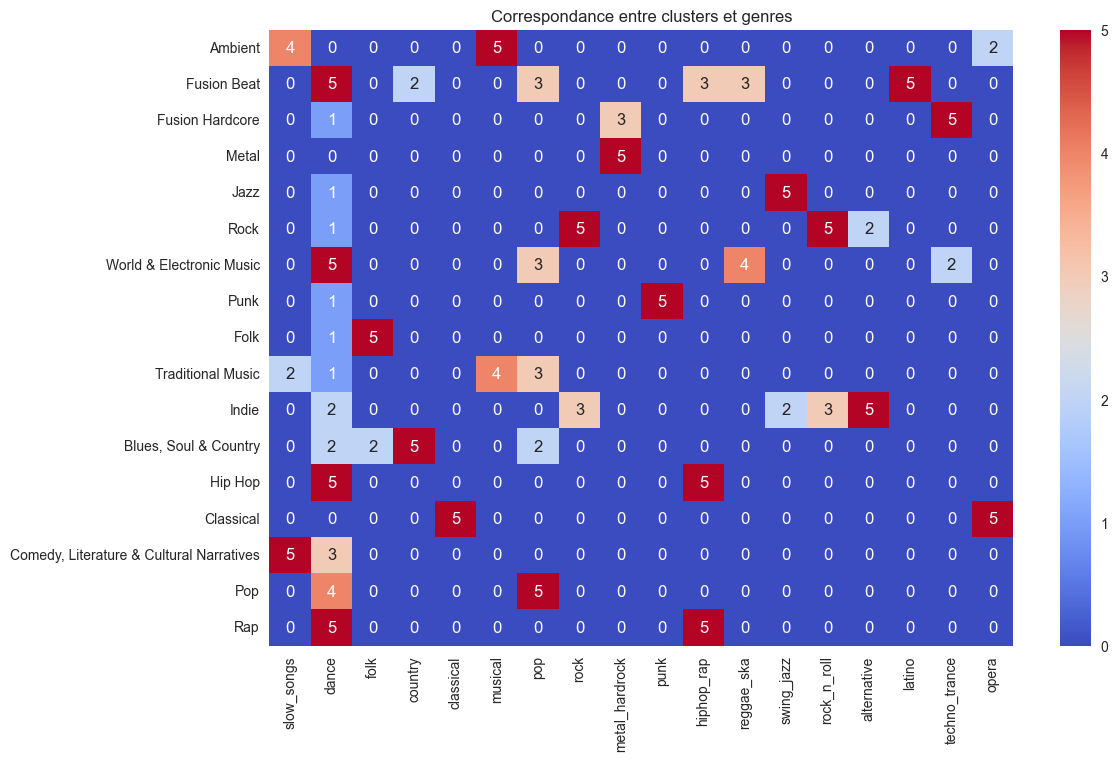

In [55]:
# Liste des clusters
cluster_names = [
    'Ambient', 'Fusion Beat', 'Fusion Hardcore', 'Metal', 'Jazz', 'Rock',
    'World & Electronic Music', 'Punk', 'Folk', 'Traditional Music', 'Indie',
    'Blues, Soul & Country', 'Hip Hop', 'Classical', 'Comedy, Literature & Cultural Narratives',
    'Pop', 'Rap'
]

# Genres musicaux dans la base de profils
profile_genres = [
    'slow_songs', 'dance', 'folk', 'country', 'classical', 'musical', 'pop', 'rock',
    'metal_hardrock', 'punk', 'hiphop_rap', 'reggae_ska', 'swing_jazz', 'rock_n_roll',
    'alternative', 'latino', 'techno_trance', 'opera'
]

profile_genres_adaptee = [
    'folk', 'country', 'classical', 'pop', 'rock',
    'metal', 'punk', 'hip hop', 'rap', 'reggae', 'jazz',
    'alternative', 'latino', 'techno', 'opera'
]

cluster_counts = pd.DataFrame(columns=['cluster', 'cluster_name'] + profile_genres_adaptee)

# Itérer sur les clusters uniques, triés dans l'ordre croissant
for cluster in sorted(genres_clusters_csv['cluster'].unique()):
    # Filtrer les genres du cluster courant
    cluster_genres = genres_clusters_csv[genres_clusters_csv['cluster'] == cluster]['genres']

    # Compter les occurrences pour chaque genre de profil
    counts = {genre: cluster_genres.str.contains(genre, case=False, na=False).sum() for genre in profile_genres_adaptee}

    # Ajouter les résultats au DataFrame, y compris le nom du cluster
    cluster_counts = pd.concat([cluster_counts, pd.DataFrame([{
        **{'cluster': cluster, 'cluster_name': cluster_names[cluster]}, **counts
    }])], ignore_index=True)

# Afficher les résultats (ignorer pour slow_songs, dance et musical je me suis refere directement au stats des clusters pour ces catégories)
print(cluster_counts)


# Matrice de correspondance avec des notes arbitraires (exemple)
correspondence_matrix = pd.DataFrame(
    [
        # Correspondances pour chaque cluster (0-5 pour chaque genre du profil)
        [4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],  # Ambient
        [0, 5, 0, 2, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 5, 0, 0],  # Fusion Beat
        [0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0],  # Fusion Hardcore
        [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Metal
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],  # Jazz
        [0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0],  # Rock
        [0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0],  # World & Electronic Music
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],  # Punk
        [0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Folk
        [2, 1, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Traditional Music
        [0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 5, 0, 0, 0],  # Indie
        [0, 2, 2, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Blues, Soul & Country
        [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],  # Hip Hop
        [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],  # Classical
        [5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Comedy, Literature & Cultural Narratives
        [0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pop
        [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]   # Rap
    ],
    index=cluster_names,
    columns=profile_genres
)


#print(correspondence_matrix.loc['Ambient'])

# Afficher une heatmap des correspondances pour une meilleure visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correspondence_matrix, annot=True, cmap='coolwarm', fmt="d")
plt.title("Correspondance entre clusters et genres")
plt.show()


In [61]:
# Charger les fichiers nécessaires
cleaned_profiles = pd.read_csv('../data/cleaned_profils.csv')

# Initialiser les colonnes des nouveaux genres (cluster_names)
for cluster_name in cluster_names:
    cleaned_profiles[cluster_name] = 0  # Initialise les nouvelles colonnes à 0

# Calculer la somme des coefficients pour chaque ligne de la matrice
row_sums = correspondence_matrix.sum(axis=1)

for profile_genre in profile_genres:
    if profile_genre in cleaned_profiles.columns:
        for cluster_name in cluster_names:
            # Diviser par la somme des coefficients pour pondérer
            weight = correspondence_matrix.loc[cluster_name, profile_genre] / row_sums[cluster_name]
            cleaned_profiles[cluster_name] += (
                cleaned_profiles[profile_genre] * weight
            )
         


# Supprimer les colonnes des anciens genres musicaux (profile_genres)
cleaned_profiles.drop(columns=profile_genres, inplace=True)

# Sauvegarder le nouveau fichier CSV
cleaned_profiles.to_csv('../data/cleaned_profils_with_clusters.csv', index=False)

print("Nouveau fichier créé : 'cleaned_profils_with_clusters.csv'")


Nouveau fichier créé : 'cleaned_profils_with_clusters.csv'


In [9]:
year_data = pd.read_csv("../data/data_by_year.csv")

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [10]:
# Charger les données
data = pd.read_csv('../data/data.csv')
data_w_genres = pd.read_csv('../data/data_w_genres.csv')
genres_clusters = pd.read_csv('../data/genres_clusters.csv')

# Associer les genres aux musiques dans data.csv
def get_genres_from_artists(artists, data_w_genres):
    """Récupère les genres associés à une liste d'artistes."""
    genres = set()
    for artist in artists:
        # Utilisation de regex=False pour éviter les erreurs liées aux caractères spéciaux
        artist_genres = data_w_genres[data_w_genres['artists'].str.contains(artist, regex=False, na=False)]['genres']
        artist_genres = artist_genres.explode().dropna().tolist()
        genres.update(artist_genres)
    return list(genres)

data['genres'] = data['artists'].apply(lambda x: get_genres_from_artists(eval(x), data_w_genres))

# Filtrer les genres pertinents à partir des clusters
def get_genres_from_clusters(music_genres, genres_clusters):
    """Récupère les genres liés aux clusters correspondant à une liste de genres."""
    relevant_clusters = genres_clusters[genres_clusters['genre'].isin(music_genres)]['cluster'].unique()
    relevant_genres = genres_clusters[genres_clusters['cluster'].isin(relevant_clusters)]['genre'].unique()
    return relevant_genres

data['relevant_genres'] = data['genres'].apply(lambda x: get_genres_from_clusters(x, genres_clusters))

# Filtrer les musiques appartenant aux genres pertinents
relevant_genres = set(data['relevant_genres'].explode())
filtered_data = data[data['genres'].apply(lambda x: any(genre in relevant_genres for genre in x))]

# Créer un mapping des musiques
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Préparer les données pour le mapping (extraction des colonnes numériques)
numeric_features = filtered_data.select_dtypes(include=['number']).fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Réduction dimensionnelle pour mapping
tsne = TSNE(n_components=2, random_state=42)
mapping = tsne.fit_transform(scaled_features)

# Ajouter les coordonnées du mapping au DataFrame
filtered_data['x'], filtered_data['y'] = mapping[:, 0], mapping[:, 1]

# Sauvegarder le résultat
filtered_data.to_csv('../data/mapped_recommendations.csv', index=False)


KeyboardInterrupt: 